In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import pandas as pd

df = pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv",delimiter=";")
df

,Year,log q,log h,log p,log p_c,log p_v,log w,log n,log(y/n),log p_f
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


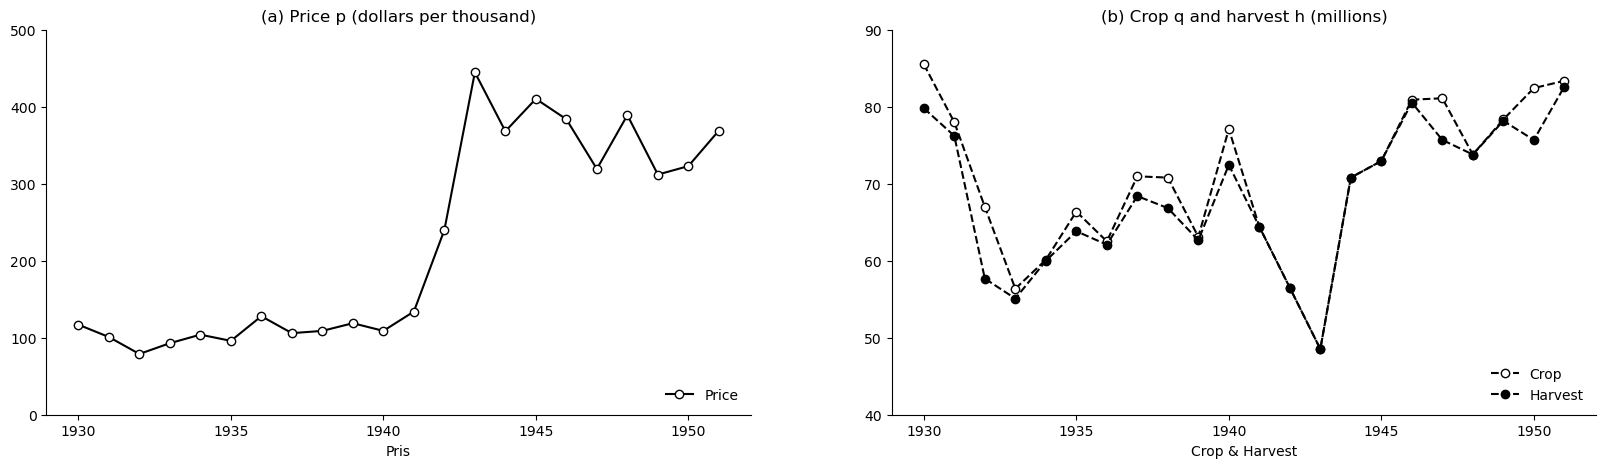

In [40]:
#7.1.1
df_1 = df[["Year", "log p", "log q", "log h"]].copy()

df_1["p"] = np.exp(df_1["log p"])
df_1["q"] = np.exp(df_1["log q"])
df_1["h"] = np.exp(df_1["log h"])

p_num=np.linspace(30,50,2)

def create_ax2():
                fig, axs = plt.subplots(1,2, sharey=False, figsize=(20,5))
                for i in range(2):
                    axs[i].spines['top'].set_color('none')
                    axs[i].spines['right'].set_color('none')
                    axs[i].legend()
                return fig, axs

fig, axs = create_ax2()

axs[0].set_xlabel('Pris', loc='center')
axs[1].set_xlabel('Crop & Harvest', loc='center')

axs[0].set(ylim=(0,500))
axs[1].set(ylim=(40,90))
            
axs[0].plot(df_1["Year"], df_1["p"], color="black", marker="o", markerfacecolor="white", label="Price") #Price
axs[1].plot(df_1["Year"], df_1["q"], linestyle="dashed", color="black", marker="o", markerfacecolor="white", label="Crop")
axs[1].plot(df_1["Year"], df_1["h"], linestyle="dashed", color="black", marker="o", label="Harvest")
axs[0].set_title('(a) Price p (dollars per thousand)')
axs[1].set_title('(b) Crop q and harvest h (millions)')

axs[0].legend(loc='lower right',frameon=False)
axs[1].legend(loc='lower right',frameon=False)

In [56]:
7.1.2
q = range(20, 105, 5)

df_2 = pd.DataFrame(q, columns=['Q'])
df_2["logQ"] = np.log(df_2["Q"])
df_2["supply(logP)"] = -2.0+1.7*np.log(df_2["Q"])
df_2["demand(logP)"] = 8.5-0.82*np.log(df_2["Q"])
df_2["demand"] = np.exp(df_2["demand(logP)"])
df_2["supply"] = np.exp(df_2["supply(logP)"])
df_2["new_supply(logP)"] = -2.0+1.7*np.log(df_2["Q"]) + 0.4
df_2["new_supply(P)"] = np.exp(df_2["new_supply(logP)"])
df_2["LogP"] = -2.0+1.7*(df_2["logQ"])

df_2

,Q,logQ,supply(logP),demand(logP),demand,supply,new_supply(logP),new_supply(P),LogP
0,20,2.995732,3.092745,6.043500,421.365040,22.037485,3.492745,32.876064,3.092745
1,25,3.218876,3.472089,5.860522,350.907208,32.203943,3.872089,48.042638,3.472089
2,30,3.401197,3.782036,5.711018,302.178574,43.905322,4.182036,65.499044,3.782036
3,35,3.555348,4.044092,5.584615,266.297629,57.059336,4.444092,85.122526,4.044092
4,40,3.688879,4.271095,5.475119,238.678832,71.600000,4.671095,106.814648,4.271095
5,45,3.806662,4.471326,5.378537,216.704952,87.472655,4.871326,130.493867,4.471326
6,50,3.912023,4.650439,5.292141,198.768561,104.630920,5.050439,156.090990,4.650439
7,55,4.007333,4.812466,5.213987,183.825472,123.034698,5.212466,183.546201,4.812466
8,60,4.094345,4.960386,5.142637,171.166618,142.648813,5.360386,212.807022,4.960386
9,65,4.174387,5.096458,5.077002,160.292847,163.442028,5.496458,243.826854,5.096458


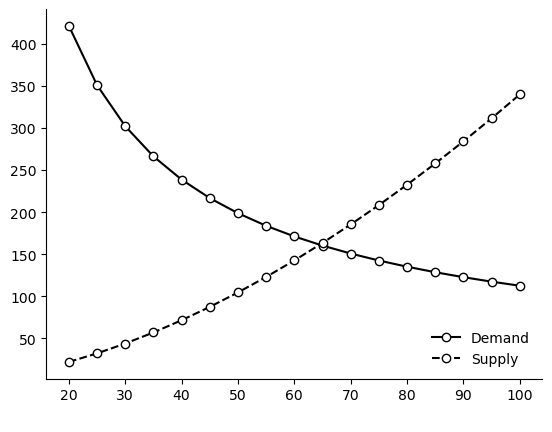

In [24]:
#7.1.3
fig, ax = plt.subplots()

ax.set_xlabel(' ', loc='center')
                
ax.plot(df_2["Q"], df_2["demand"], color="black", marker="o", markerfacecolor="white", label="Demand")
ax.plot(df_2["Q"], df_2["supply"], linestyle="dashed", color="black", marker="o", markerfacecolor="white", label="Supply")

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.legend(loc='lower right',frameon=False)
ax.legend(loc='lower right',frameon=False)

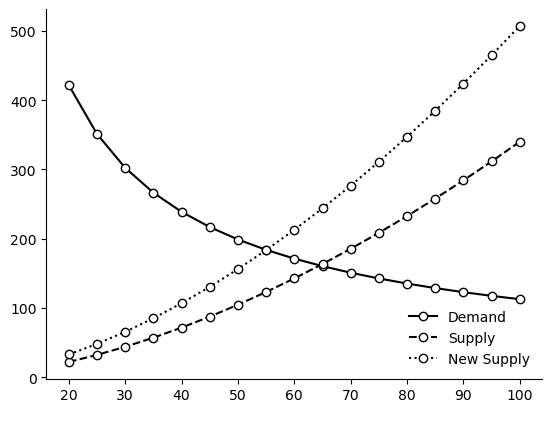

In [25]:
fig, ax = plt.subplots()

ax.set_xlabel(' ', loc='center')
               
ax.plot(df_2["Q"], df_2["demand"], color="black", marker="o", markerfacecolor="white", label="Demand")
ax.plot(df_2["Q"], df_2["supply"], linestyle="dashed", color="black", marker="o", markerfacecolor="white", label="Supply")
ax.plot(df_2["Q"], df_2["new_supply(P)"], linestyle="dotted", color="black", marker="o", markerfacecolor="white", label="New Supply")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.legend(loc='lower right',frameon=False)
ax.legend(loc='lower right',frameon=False)

In [5]:
#7.2.1 A)
p, q = sp.symbols('p, q', real=True, positive=True)
                  
eq = sp.Eq(-2+1.7*sp.log(q), sp.log(p))

sp.solve(eq, sp.log(q))

#elasitsiteten er 0.588.

[0.588235294117647*log(p) + 1.17647058823529]

In [7]:
#7.2.1 B)
eq = sp.Eq(8.5-0.82*sp.log(q), sp.log(p))

sp.solve(eq, sp.log(q))

#elastiisteten er 1.219.

[10.3658536585366 - 1.21951219512195*log(p)]

In [52]:
#7.2.2
#prisen på vannmeloner er med på å drive opp antallet bonden vil plante, det motsatte gjelder grønnsaker og bommull.
#forskjellen når det gjelder bomull er kompensasjonsordningen som er med på å holde prisene oppe.
#sistnevnt WW2 er en ekstra variabel for å beregne dersom USA er involvert.

#7.2.3
#I sammenheng med demand vil en økning i pris på vannmeloner være med på å drive ned demand.
#per capita income vil være med på å motvirke økningen i prisen om income klarer å holde følge med økningen.
#kostnaden for å transportere vil da igjen være med på å tynge inntekten man kan forvete å tjene på vannmeloner.

#7.2.4
#et exogenous demand shock er en plutselig og kraftig økning eller nedgang i etterspørsel.
#2.verdenskrig og diverse børskrakk er et eksempel på slike etterspørsels sjokk da de resulterer i endringer
# i markedet uten av at de er dirkete tilknyttet et bestemt marked.